In [19]:
import math
import unittest
import json

import helper
import street_mapping as sm
# import rasterio

import matplotlib.pyplot as plt

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# test land cover functions

Road surface classes:[5, 7, 9, 10, 11, 16, 24, 30, 35, 40, 45]
5	construction--flat--bike-lane
7	construction--flat--parking
9	construction--flat--rail-track
10	construction--flat--road
11	construction--flat--service-lane
16	marking--general
24	object--pothole
30	construction--flat--crosswalk-plain
35	marking--crosswalk-zebra
40	object--catch-basin
45	object--manhole


Road edges: [0, 1, 2, 3, 4, 6, 8, 12, 14, 21, 22, 23, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53]
0	construction--barrier--curb
1	construction--barrier--fence
2	construction--barrier--guard-rail
3	construction--barrier--other-barrier
4	construction--barrier--wall
6	construction--flat--curb-cut
8	construction--flat--pedestrian-area
12	construction--flat--sidewalk
14	construction--structure--building
21	nature--terrain
22	nature--vegetation
23	nature--water
36	object--banner
37	object--bench
38	object--bike-rack
39	object--billboard
41	object--cctv-camera
42	object--fire-hydrant
43	object--junction-box
44	object--mailbox
46	object--phone-booth
47	object--street-light
48	object--support--pole
49	object--support--traffic-sign-frame
50	object--support--utility-pole
51	object--traffic-light
52	object--traffic-sign--back
53	object--traffic-sign--front


Occluded: [25, 28, 29, 31, 32, 33, 34, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 255]
25	object--vehicle--on-rails
28	animal--bird
29	animal--ground-animal
31	human--person
32	human--rider--bicyclist
33	human--rider--motorcyclist
34	human--rider--other-rider
54	object--trash-can
55	object--vehicle--bicycle
56	object--vehicle--boat
57	object--vehicle--bus
58	object--vehicle--car
59	object--vehicle--caravan
60	object--vehicle--motorcycle
61	object--vehicle--other-vehicle
62	object--vehicle--trailer
63	object--vehicle--truck
64	object--vehicle--wheeled-slow
255 other

In [28]:
seg_file = r'./test_images/S_ZmoNLdzo0FApj_jGiFJg_DOM_0.05.tif'

img_landcover = sm.Image_landcover(landcover_path=seg_file)

# img_smoothed = helper.img_smooth(img_cv=img_landcover.landcover_np)

# plt.imshow(img_landcover.landcover_pil)
# img_landcover.scan_width(pano_bearing_deg=196.219, target_ids=[10])  #[8, 12] is sidewalk, [10]: road
img_landcover.scan_width(pano_bearing_deg=225, target_ids=[10, 16, 24, 30, 35])  #[8, 12] is sidewalk, [10]: road
# plt.imshow(img_landcover.target_img_np)
# img_landcover.img_rotated.max()

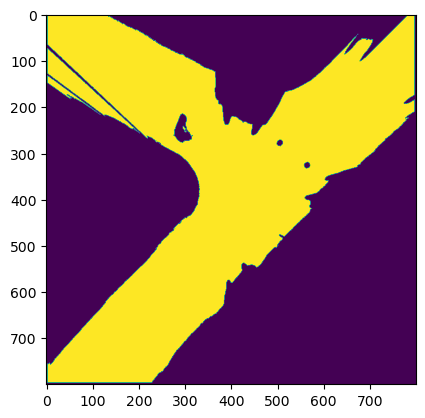

In [29]:
plt.imshow(img_landcover.target_img_np)

In [22]:
import numpy as np
plt.imshow(img_landcover.img_rotated)
plt.colorbar()

AttributeError: 'Image_landcover' object has no attribute 'img_rotated'

In [23]:
img_landcover.target_img_np.mean()

0.4155484375

In [131]:
import geopandas as gpd
road_gdf = gpd.read_file(r'E:\Research\street_image_mapping\DC_roads2.shp')
road_gdf

KeyboardInterrupt: 

In [6]:
import glob
from tqdm import tqdm
import pandas as pd
import os
import utils
def merge_csv(file_dir=r'D:\Research\street_image_mapping\DC_roads'):
    files = glob.glob(os.path.join(file_dir, '*.csv'))
    all_df_list = []
    for f in tqdm(files[:]):
        # print(f)
        df = pd.read_csv(f)
        all_df_list.append(df)

    all_df = pd.concat(all_df_list)
    all_df.to_csv(r'D:\Research\street_image_mapping\DC_roads.csv', index=False)
    return  all_df


all_df = merge_csv()

100%|██████████| 157367/157367 [17:15<00:00, 151.94it/s]


In [7]:
len(all_df)

35273586

In [8]:
all_df.columns

Index(['start_x', 'start_y', 'end_x', 'end_y', 'cover_ratio', 'touch_invalid',
       'touch_valid', 'length', 'file_name'],
      dtype='object')

In [9]:
t_df = all_df.query(" length > 3 and touch_invalid ==0 and cover_ratio > 0.9 ")

In [10]:
len(t_df)

8012799

In [15]:
t_df.to_csv(r'D:\Research\street_image_mapping\DC_roads_valid.csv', index=False)

In [18]:
helper.measurements_to_shapefile(widths_files=['D:\Research\street_image_mapping\DC_roads_valid.csv'],saved_path=r'D:\Research\street_image_mapping')

E:\Research\street_image_mapping\Python_code\helper.py:445: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(new_name)


2023-01-25 11:55:52,639 - fiona._env - WARNING - __init__ - 165 - Normalized/laundered field name: 'cover_ratio' to 'cover_rati'
2023-01-25 11:55:52,641 - fiona._env - WARNING - __init__ - 165 - Normalized/laundered field name: 'touch_invalid' to 'touch_inva'
2023-01-25 11:55:52,641 - fiona._env - WARNING - __init__ - 165 - Normalized/laundered field name: 'touch_valid' to 'touch_vali'


In [13]:
all_df['touch_invalid'].value_counts()

1    21908276
0    13365310
Name: touch_invalid, dtype: int64

In [14]:
all_df['touch_valid'].value_counts()

0    18125580
1    17148006
Name: touch_valid, dtype: int64